In [ ]:
!pip install -U transformers


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Real data combined

In [ ]:
file_path ="/content/drive/MyDrive/MTech/Sem 2/Mini Project/Mini Project All/Datasets/Selected /Training datasets/unified_dataset_for_synthetic_generation.csv"

In [ ]:
df = pd.read_csv(file_path)
df.head()

,text,combined_label,source
0,when modi promised “minimum government maximum...,sentiment_negative,sentiment
1,talk all the nonsense and continue all the dra...,sentiment_neutral,sentiment
2,what did just say vote for modi welcome bjp t...,sentiment_positive,sentiment
3,asking his supporters prefix chowkidar their n...,sentiment_positive,sentiment
4,answer who among these the most powerful world...,sentiment_positive,sentiment


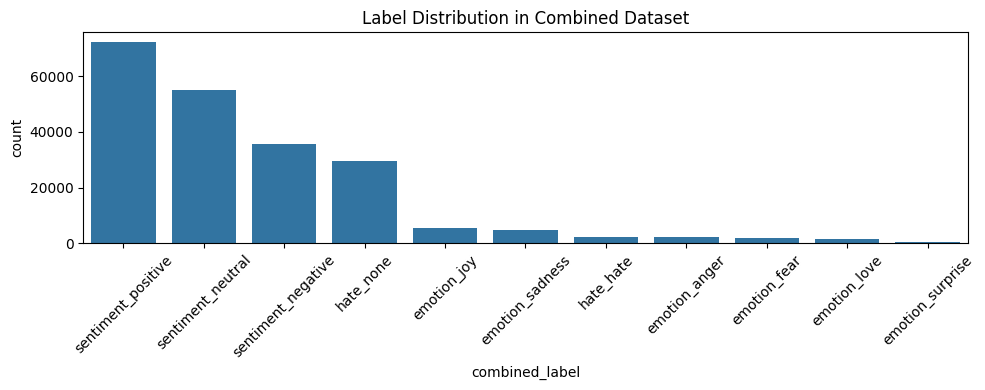

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='combined_label', order=df['combined_label'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Label Distribution in Combined Dataset")
plt.tight_layout()
plt.show()


In [ ]:
# Basic cleaning: drop missing or nulls
df.dropna(subset=["text", "combined_label"], inplace=True)

# Step 1: Label Encoding
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['combined_label'])



In [ ]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label_encoded'], test_size=0.2, random_state=42, stratify=df['label_encoded']
)

# Step 3: Text Vectorization
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Step 4: Train a classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Step 5: Evaluation
y_pred = model.predict(X_test_vec)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))



✅ Accuracy: 0.850901936615545

📊 Confusion Matrix:
 [[  320     5    21     2    34     0     0    28     7     6     9]
 [   16   292    27     1    17    10     0    13     8     1     2]
 [   10     2   949    28    18     2     0    34     0     1    29]
 [    1     1    61   172     2     0     0    16     2     0     6]
 [   13    11    45     2   810     2     1    32     6     1    10]
 [    0    23     9     0    10    63     0     5     1     1     2]
 [    0     0     0     0     0     0   175   219    19    20    15]
 [    2     0    49     1    14     1    14  5474    75   153   161]
 [    0     1     1     0     0     0     1    54  5256   815   974]
 [    0     0     3     0     4     0     0   127   130 10394   385]
 [    0     0     9     0     2     0     1   130   668  1648 11992]]

📝 Classification Report:
                     precision    recall  f1-score   support

     emotion_anger       0.88      0.74      0.81       432
      emotion_fear       0.87      0.75

## Testing with the generated data

In [ ]:
new_file_path ="/content/synthetic_combined_dataset.csv"

In [ ]:
new_df = pd.read_csv(file_path)
new_df.head()

,text,combined_label,source
0,when modi promised “minimum government maximum...,sentiment_negative,sentiment
1,talk all the nonsense and continue all the dra...,sentiment_neutral,sentiment
2,what did just say vote for modi welcome bjp t...,sentiment_positive,sentiment
3,asking his supporters prefix chowkidar their n...,sentiment_positive,sentiment
4,answer who among these the most powerful world...,sentiment_positive,sentiment


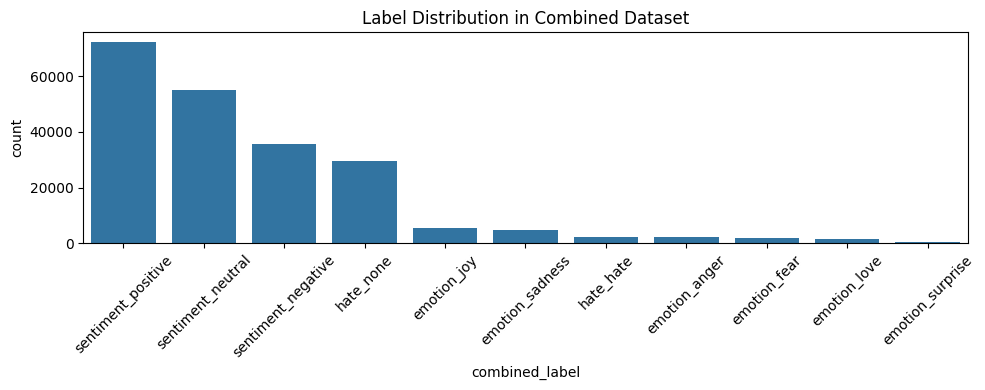

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.countplot(data=new_df, x='combined_label', order=new_df['combined_label'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Label Distribution in Combined Dataset")
plt.tight_layout()
plt.show()


In [ ]:
# Basic cleaning: drop missing or nulls
new_df.dropna(subset=["text", "combined_label"], inplace=True)

# Step 1: Label Encoding
le = LabelEncoder()
new_df['label_encoded'] = le.fit_transform(new_df['combined_label'])



In [ ]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    new_df['text'], new_df['label_encoded'], test_size=0.2, random_state=42, stratify=new_df['label_encoded']
)

# Step 3: Text Vectorization
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Step 4: Train a classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Step 5: Evaluation
y_pred = model.predict(X_test_vec)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))



✅ Accuracy: 0.850901936615545

📊 Confusion Matrix:
 [[  320     5    21     2    34     0     0    28     7     6     9]
 [   16   292    27     1    17    10     0    13     8     1     2]
 [   10     2   949    28    18     2     0    34     0     1    29]
 [    1     1    61   172     2     0     0    16     2     0     6]
 [   13    11    45     2   810     2     1    32     6     1    10]
 [    0    23     9     0    10    63     0     5     1     1     2]
 [    0     0     0     0     0     0   175   219    19    20    15]
 [    2     0    49     1    14     1    14  5474    75   153   161]
 [    0     1     1     0     0     0     1    54  5256   815   974]
 [    0     0     3     0     4     0     0   127   130 10394   385]
 [    0     0     9     0     2     0     1   130   668  1648 11992]]

📝 Classification Report:
                     precision    recall  f1-score   support

     emotion_anger       0.88      0.74      0.81       432
      emotion_fear       0.87      0.75

## Comparison between Real and Generated Data

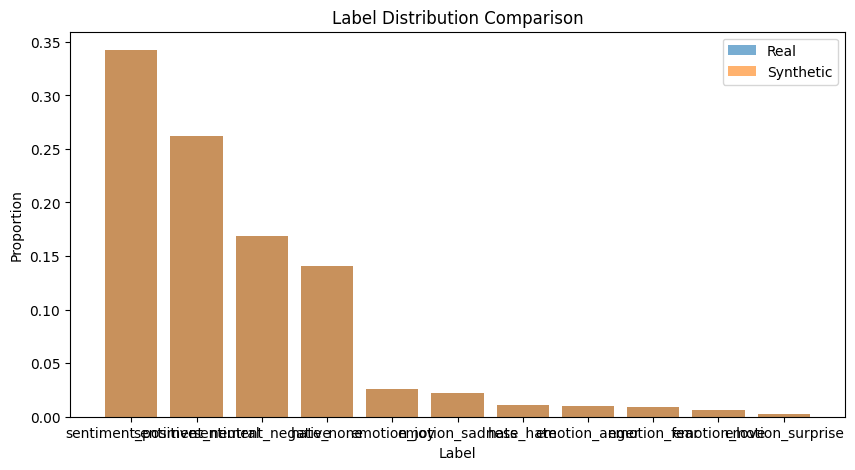

In [ ]:
import matplotlib.pyplot as plt

# Label distribution comparison
real_label_dist = df['combined_label'].value_counts(normalize=True)
synthetic_label_dist = new_df['combined_label'].value_counts(normalize=True)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(real_label_dist.index.astype(str), real_label_dist.values, alpha=0.6, label='Real')
plt.bar(synthetic_label_dist.index.astype(str), synthetic_label_dist.values, alpha=0.6, label='Synthetic')
plt.title('Label Distribution Comparison')
plt.xlabel('Label')
plt.ylabel('Proportion')
plt.legend()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Vectorize text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
real_tfidf = vectorizer.fit_transform(df['text'].astype(str))
synthetic_tfidf = vectorizer.transform(new_df['text'].astype(str))

# Calculate cosine similarity between each synthetic row and all real rows
similarity_matrix = cosine_similarity(synthetic_tfidf, real_tfidf)

# Count how many synthetic rows have a close real match
match_threshold = 0.9  # similarity threshold
match_counts = np.sum(similarity_matrix.max(axis=1) > match_threshold)
matching_percent = (match_counts / synthetic_data.shape[0]) * 100

print(f"Text Matching Percentage: {matching_percent:.2f}% of synthetic rows are similar to real rows (>{match_threshold} similarity).")


# for sampled datset

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import pipeline as hf_pipeline
import torch
# from datasets import Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###load the datasets

In [ ]:
real_df= pd.read_csv("/content/drive/MyDrive/Mini Project/Generated/sampled.csv")
synthetic_df=pd.read_csv("/content/drive/MyDrive/Mini Project/Generated/combined_synthetic_sentiment_data.csv")

###functions for training and testing

In [ ]:
def train_and_predict_all_models(
    df,
    target_col="label",
    transformers_models=["distilbert-base-uncased"],
    test_size=0.2,
    max_length=128,
    use_cuda=torch.cuda.is_available()
):
    def run_ml_models(df):
        print(f"\n----- Traditional ML Models -----\n")
        X = df["text"]
        y = df[target_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

        models = {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "Naive Bayes": MultinomialNB(),
            "SVM": SVC(),
            "Random Forest": RandomForestClassifier()
        }

        for name, model in models.items():
            pipe = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', model)
            ])
            pipe.fit(X_train, y_train)
            y_pred = pipe.predict(X_test)
            print(f"\nModel: {name}")
            print(classification_report(y_test, y_pred))

    def run_transformer_models(df):
        print(f"\n----- Transformer Models -----\n")

        for model_name in transformers_models:
            print(f"\nTransformer: {model_name}\n")
            tokenizer = AutoTokenizer.from_pretrained(model_name)

            def tokenize_function(examples):
                return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=max_length)

            hf_dataset = Dataset.from_pandas(df[["text", target_col]].rename(columns={target_col: "label"}))
            hf_dataset = hf_dataset.class_encode_column("label")
            num_labels = hf_dataset.features['label'].num_classes

            tokenized_dataset = hf_dataset.map(tokenize_function, batched=True)
            tokenized_dataset = tokenized_dataset.train_test_split(test_size=test_size)
            tokenized_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

            model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

            training_args = TrainingArguments(
                output_dir="./results",
                learning_rate=2e-5,
                per_device_train_batch_size=8,
                per_device_eval_batch_size=8,
                num_train_epochs=10,
                weight_decay=0.01,
                save_strategy="no",
                logging_dir="./logs",
                disable_tqdm=True,
            )


            trainer = Trainer(
                model=model,
                args=training_args,
                train_dataset=tokenized_dataset['train'],
                eval_dataset=tokenized_dataset['test']
            )

            trainer.train()
            preds = trainer.predict(tokenized_dataset['test'])
            y_pred = preds.predictions.argmax(axis=-1)
            y_true = tokenized_dataset['test']['label']

            print(classification_report(y_true, y_pred))

    # Run models
    run_ml_models(df.copy())
    run_transformer_models(df.copy())


In [ ]:
import pandas as pd

def sample_per_class(df, label_col='label', samples_per_class=100, random_state=42, shuffle=True):

    sampled_dfs = []
    for label in df[label_col].unique():
        class_df = df[df[label_col] == label]
        sampled = class_df.sample(n=min(samples_per_class, len(class_df)), random_state=random_state)
        sampled_dfs.append(sampled)

    result_df = pd.concat(sampled_dfs).reset_index(drop=True)
    if shuffle:
        result_df = result_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    return result_df


In [ ]:
def combine_datasets(df1, df2, drop_duplicates=True, shuffle=True, random_state=42):

    combined_df = pd.concat([df1, df2], ignore_index=True)

    if drop_duplicates:
        combined_df = combined_df.drop_duplicates().reset_index(drop=True)

    if shuffle:
        combined_df = combined_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    return combined_df


###1.Training and testing with the real dataset

In [ ]:
real_df.shape

(21644, 19)

In [ ]:
real_df.columns

Index(['text', 'sentiment_label', 'emotion_label', 'hate_speech_label',
       'source_dataset', 'fine_grained_label', 'sentiment_label_text',
       'predicted_sentiment_label', 'bert_predicted_sentiment_label',
       'predicted_sentiment_label_numeric', 'final_sentiment',
       'final_sentiment_label', 'validation_flags', 'final_validation_flags',
       'fine_grained_validation_flags', 'ensemble_sentiment',
       'overall_sentiment', 'sentiment_str', 'predicted_fine_grained'],
      dtype='object')

In [ ]:
real_df.head()

,text,sentiment_label,emotion_label,hate_speech_label,source_dataset,fine_grained_label,sentiment_label_text,predicted_sentiment_label,bert_predicted_sentiment_label,predicted_sentiment_label_numeric,final_sentiment,final_sentiment_label,validation_flags,final_validation_flags,fine_grained_validation_flags,ensemble_sentiment,overall_sentiment,sentiment_str,predicted_fine_grained
0,india joins the elite club congratulations all...,1.0,1.0,0.0,sentiment_dataset,joyful,Positive,Positive,1,1,1,Positive,NaN,NaN,Mismatch: Fine-grained label 'joyful' should h...,1,1,positive,joy
1,this pure bravery only firing bullets and ches...,1.0,0.0,0.0,sentiment_dataset,melancholy,Positive,Positive,1,1,1,Positive,Mismatch: Sentiment should be 'negative' for f...,Mismatch: Sentiment should be 'negative' for f...,Mismatch: Fine-grained label 'melancholy' shou...,1,1,positive,surprise
2,you are true you have guts then the video wher...,1.0,1.0,0.0,sentiment_dataset,joyful,Positive,Positive,1,1,1,Positive,NaN,NaN,Mismatch: Fine-grained label 'joyful' should h...,1,1,positive,surprise
3,when modi was destroying economy with demoneti...,-1.0,1.0,0.0,sentiment_dataset,joyful,Negative,Negative,-1,-1,-1,Negative,Mismatch: Sentiment should be 'positive' for f...,Mismatch: Sentiment should be 'positive' for f...,Mismatch: Fine-grained label 'joyful' should h...,-1,-1,negative,surprise
4,excellent,1.0,1.0,0.0,sentiment_dataset,joyful,Positive,Positive,1,1,1,Positive,NaN,NaN,Mismatch: Fine-grained label 'joyful' should h...,1,1,positive,joy


In [ ]:
def get_class_distribution(df, label_col='label', normalize=False):

    distribution = df[label_col].value_counts(normalize=normalize).sort_index()
    return distribution


####A.over all sentiment

In [ ]:
# Get raw counts
print(get_class_distribution(real_df, label_col='overall_sentiment'))

# Get percentage distribution
print(get_class_distribution(real_df, label_col='overall_sentiment', normalize=True))


overall_sentiment
-1    11423
 0      135
 1    10086
Name: count, dtype: int64
overall_sentiment
-1    0.527768
 0    0.006237
 1    0.465995
Name: proportion, dtype: float64


In [ ]:
# Get 50 samples per class from real data
eval_real = sample_per_class(real_df, label_col='sentiment_str', samples_per_class=135)


In [ ]:
get_class_distribution(real_df, label_col='overall_sentiment')

,count
overall_sentiment,
-1,11423
0,135
1,10086


In [ ]:
# For real data
train_and_predict_all_models(eval_real, target_col="sentiment_str")




----- Traditional ML Models -----


Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.56      0.56      0.56        27
     neutral       0.60      0.56      0.58        27
    positive       0.45      0.48      0.46        27

    accuracy                           0.53        81
   macro avg       0.53      0.53      0.53        81
weighted avg       0.53      0.53      0.53        81


Model: Naive Bayes
              precision    recall  f1-score   support

    negative       0.52      0.56      0.54        27
     neutral       0.60      0.44      0.51        27
    positive       0.44      0.52      0.47        27

    accuracy                           0.51        81
   macro avg       0.52      0.51      0.51        81
weighted avg       0.52      0.51      0.51        81


Model: SVM
              precision    recall  f1-score   support

    negative       0.47      0.56      0.51        27
     neutral       0.57      0.44

Casting to class labels:   0%|          | 0/405 [00:00<?, ? examples/s]

Map:   0%|          | 0/405 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'train_runtime': 39.2054, 'train_samples_per_second': 82.642, 'train_steps_per_second': 10.458, 'train_loss': 0.30427110253310785, 'epoch': 10.0}
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.83      0.74      0.78        27
           2       0.71      0.95      0.82        21

    accuracy                           0.84        81
   macro avg       0.84      0.85      0.83        81
weighted avg       0.86      0.84      0.84        81



#####b. finegrained sentiment

In [ ]:
# Get raw counts
print(get_class_distribution(real_df, label_col='predicted_fine_grained'))

# Get percentage distribution
print(get_class_distribution(real_df, label_col='predicted_fine_grained', normalize=True))


predicted_fine_grained
anger        1139
fear         1430
hate         1402
joy          4010
love          879
neutral       528
sadness      1495
surprise    10761
Name: count, dtype: int64
predicted_fine_grained
anger       0.052624
fear        0.066069
hate        0.064775
joy         0.185271
love        0.040612
neutral     0.024395
sadness     0.069072
surprise    0.497182
Name: proportion, dtype: float64


In [ ]:
# Get 50 samples per class from real data
eval_real = sample_per_class(real_df, label_col='predicted_fine_grained', samples_per_class=528)


In [ ]:
# For real data
train_and_predict_all_models(eval_real, target_col="predicted_fine_grained")




----- Traditional ML Models -----


Model: Logistic Regression
              precision    recall  f1-score   support

       anger       0.34      0.30      0.32       105
        fear       0.44      0.49      0.46       105
        hate       0.59      0.58      0.59       106
         joy       0.51      0.52      0.52       106
        love       0.74      0.66      0.70       106
     neutral       0.39      0.40      0.39       105
     sadness       0.46      0.48      0.47       106
    surprise       0.32      0.33      0.33       106

    accuracy                           0.47       845
   macro avg       0.47      0.47      0.47       845
weighted avg       0.47      0.47      0.47       845


Model: Naive Bayes
              precision    recall  f1-score   support

       anger       0.44      0.28      0.34       105
        fear       0.41      0.59      0.48       105
        hate       0.49      0.64      0.56       106
         joy       0.53      0.45      0.49     

Casting to class labels:   0%|          | 0/4224 [00:00<?, ? examples/s]

Map:   0%|          | 0/4224 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 1.4926, 'grad_norm': 8.468107223510742, 'learning_rate': 1.764066193853428e-05, 'epoch': 1.1820330969267139}
{'loss': 0.8097, 'grad_norm': 23.818174362182617, 'learning_rate': 1.5276595744680852e-05, 'epoch': 2.3640661938534278}
{'loss': 0.4626, 'grad_norm': 11.039663314819336, 'learning_rate': 1.2912529550827424e-05, 'epoch': 3.546099290780142}
{'loss': 0.2512, 'grad_norm': 59.96455383300781, 'learning_rate': 1.0548463356973997e-05, 'epoch': 4.7281323877068555}
{'loss': 0.1233, 'grad_norm': 0.5307934880256653, 'learning_rate': 8.184397163120567e-06, 'epoch': 5.91016548463357}
{'loss': 0.0771, 'grad_norm': 0.08511648327112198, 'learning_rate': 5.82033096926714e-06, 'epoch': 7.092198581560283}
{'loss': 0.0321, 'grad_norm': 2.3883795738220215, 'learning_rate': 3.4562647754137117e-06, 'epoch': 8.274231678486998}
{'loss': 0.0362, 'grad_norm': 0.7989761233329773, 'learning_rate': 1.0921985815602839e-06, 'epoch': 9.456264775413711}
{'train_runtime': 433.7187, 'train_samples_per_seco

####2.Training and testing with the Synthetic data



In [ ]:
synthetic_df.head()

,text,overall_sentiment,fine_grained_sentiment
0,"@Jimmy_Knymer, we have not been too good but i...",neutral,neutral
1,@JerzyKrzewczynski http://twitpic.com/7ds6l - ...,neutral,neutral
2,@Miranda_Dawson What did you get them for for ...,neutral,neutral
3,"@rukiyuldoshi Ah - good point, my sister is in...",neutral,neutral
4,has become a bit tired and confused from the h...,neutral,neutral


####a. overall sentiment

In [ ]:
# Get raw counts
print(get_class_distribution(synthetic_df, label_col='overall_sentiment'))

# Get percentage distribution
print(get_class_distribution(synthetic_df, label_col='overall_sentiment', normalize=True))


overall_sentiment
negative    700
neutral     700
positive    700
Name: count, dtype: int64
overall_sentiment
negative    0.333333
neutral     0.333333
positive    0.333333
Name: proportion, dtype: float64


In [ ]:
# Get 100 samples per class from synthetic data
eval_synth = sample_per_class(synthetic_df, label_col='overall_sentiment', samples_per_class=700)

In [ ]:

# For synthetic data
train_and_predict_all_models(eval_synth, target_col="overall_sentiment")



----- Traditional ML Models -----


Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.54      0.65      0.59       140
     neutral       0.43      0.36      0.40       140
    positive       0.62      0.59      0.61       140

    accuracy                           0.54       420
   macro avg       0.53      0.54      0.53       420
weighted avg       0.53      0.54      0.53       420


Model: Naive Bayes
              precision    recall  f1-score   support

    negative       0.49      0.84      0.62       140
     neutral       0.43      0.26      0.33       140
    positive       0.70      0.47      0.56       140

    accuracy                           0.53       420
   macro avg       0.54      0.53      0.50       420
weighted avg       0.54      0.53      0.50       420


Model: SVM
              precision    recall  f1-score   support

    negative       0.55      0.66      0.60       140
     neutral       0.43      0.39

Casting to class labels:   0%|          | 0/2100 [00:00<?, ? examples/s]

Map:   0%|          | 0/2100 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 0.8066, 'grad_norm': 16.710298538208008, 'learning_rate': 1.5247619047619049e-05, 'epoch': 2.380952380952381}
{'loss': 0.4033, 'grad_norm': 22.080547332763672, 'learning_rate': 1.0485714285714286e-05, 'epoch': 4.761904761904762}
{'loss': 0.1508, 'grad_norm': 0.20102788507938385, 'learning_rate': 5.723809523809525e-06, 'epoch': 7.142857142857143}
{'loss': 0.0583, 'grad_norm': 0.051768958568573, 'learning_rate': 9.61904761904762e-07, 'epoch': 9.523809523809524}
{'train_runtime': 224.3712, 'train_samples_per_second': 74.876, 'train_steps_per_second': 9.359, 'train_loss': 0.34077884288061233, 'epoch': 10.0}
              precision    recall  f1-score   support

           0       0.76      0.68      0.71       151
           1       0.45      0.54      0.49       127
           2       0.73      0.69      0.71       142

    accuracy                           0.64       420
   macro avg       0.65      0.63      0.64       420
weighted avg       0.66      0.64      0.64       420


####b. fine grained sentiment

In [ ]:
# Get raw counts
print(get_class_distribution(synthetic_df, label_col='fine_grained_sentiment'))

# Get percentage distribution
print(get_class_distribution(synthetic_df, label_col='fine_grained_sentiment', normalize=True))


fine_grained_sentiment
anger       173
fear        174
hate        176
joy         233
love        232
neutral     700
sadness     177
surprise    235
Name: count, dtype: int64
fine_grained_sentiment
anger       0.082381
fear        0.082857
hate        0.083810
joy         0.110952
love        0.110476
neutral     0.333333
sadness     0.084286
surprise    0.111905
Name: proportion, dtype: float64


In [ ]:
# Get 100 samples per class from synthetic data
eval_synth = sample_per_class(synthetic_df, label_col='fine_grained_sentiment', samples_per_class=173)

In [ ]:

# For synthetic data
train_and_predict_all_models(eval_synth, target_col="fine_grained_sentiment")



----- Traditional ML Models -----


Model: Logistic Regression
              precision    recall  f1-score   support

       anger       0.30      0.35      0.32        34
        fear       0.34      0.32      0.33        34
        hate       0.26      0.29      0.27        35
         joy       0.26      0.26      0.26        35
        love       0.44      0.34      0.39        35
     neutral       0.28      0.21      0.24        34
     sadness       0.34      0.46      0.39        35
    surprise       0.21      0.20      0.21        35

    accuracy                           0.30       277
   macro avg       0.31      0.30      0.30       277
weighted avg       0.31      0.30      0.30       277


Model: Naive Bayes
              precision    recall  f1-score   support

       anger       0.23      0.32      0.27        34
        fear       0.30      0.53      0.38        34
        hate       0.26      0.20      0.23        35
         joy       0.20      0.06      0.09     

Casting to class labels:   0%|          | 0/1384 [00:00<?, ? examples/s]

Map:   0%|          | 0/1384 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 1.6831, 'grad_norm': 8.568510055541992, 'learning_rate': 1.2820143884892086e-05, 'epoch': 3.597122302158273}
{'loss': 0.9465, 'grad_norm': 13.590410232543945, 'learning_rate': 5.62589928057554e-06, 'epoch': 7.194244604316546}
{'train_runtime': 147.9114, 'train_samples_per_second': 74.842, 'train_steps_per_second': 9.398, 'train_loss': 1.0839202771083913, 'epoch': 10.0}
              precision    recall  f1-score   support

           0       0.25      0.50      0.34        26
           1       0.37      0.26      0.30        39
           2       0.43      0.34      0.38        35
           3       0.24      0.16      0.19        37
           4       0.40      0.38      0.39        37
           5       0.30      0.50      0.37        28
           6       0.51      0.50      0.51        38
           7       0.19      0.14      0.16        37

    accuracy                           0.34       277
   macro avg       0.34      0.35      0.33       277
weighted avg       0.34

#### training and testing for entire dataset

In [ ]:
train_and_predict_all_models(synthetic_df, target_col="fine_grained_sentiment")


----- Traditional ML Models -----


Model: Logistic Regression
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        35
        fear       0.00      0.00      0.00        35
        hate       0.67      0.06      0.11        35
         joy       0.29      0.04      0.07        47
        love       0.52      0.28      0.37        46
     neutral       0.36      0.92      0.51       140
     sadness       0.50      0.17      0.26        35
    surprise       0.00      0.00      0.00        47

    accuracy                           0.36       420
   macro avg       0.29      0.18      0.16       420
weighted avg       0.30      0.36      0.25       420


Model: Naive Bayes
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        35
        fear       0.00      0.00      0.00        35
        hate       0.00      0.00      0.00        35
         joy       0.00      0.00      0.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: SVM
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        35
        fear       0.00      0.00      0.00        35
        hate       0.00      0.00      0.00        35
         joy       0.00      0.00      0.00        47
        love       0.56      0.11      0.18        46
     neutral       0.34      0.99      0.50       140
     sadness       1.00      0.09      0.16        35
    surprise       0.00      0.00      0.00        47

    accuracy                           0.35       420
   macro avg       0.24      0.15      0.11       420
weighted avg       0.26      0.35      0.20       420



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: Random Forest
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        35
        fear       0.00      0.00      0.00        35
        hate       1.00      0.03      0.06        35
         joy       0.40      0.04      0.08        47
        love       0.33      0.13      0.19        46
     neutral       0.34      0.94      0.50       140
     sadness       0.75      0.09      0.15        35
    surprise       0.00      0.00      0.00        47

    accuracy                           0.34       420
   macro avg       0.35      0.15      0.12       420
weighted avg       0.34      0.34      0.21       420


----- Transformer Models -----


Transformer: distilbert-base-uncased



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Casting to class labels:   0%|          | 0/2100 [00:00<?, ? examples/s]

Map:   0%|          | 0/2100 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 1.7249, 'grad_norm': 5.821859836578369, 'learning_rate': 1.5247619047619049e-05, 'epoch': 2.380952380952381}
{'loss': 1.2534, 'grad_norm': 13.390127182006836, 'learning_rate': 1.0485714285714286e-05, 'epoch': 4.761904761904762}
{'loss': 0.7645, 'grad_norm': 10.920404434204102, 'learning_rate': 5.723809523809525e-06, 'epoch': 7.142857142857143}
{'loss': 0.4611, 'grad_norm': 16.77252960205078, 'learning_rate': 9.61904761904762e-07, 'epoch': 9.523809523809524}
{'train_runtime': 223.6776, 'train_samples_per_second': 75.108, 'train_steps_per_second': 9.389, 'train_loss': 1.0187240182785762, 'epoch': 10.0}
              precision    recall  f1-score   support

           0       0.17      0.10      0.12        42
           1       0.33      0.27      0.30        45
           2       0.46      0.32      0.38        37
           3       0.30      0.32      0.31        44
           4       0.41      0.29      0.34        49
           5       0.42      0.59      0.50       133
    

In [ ]:
train_and_predict_all_models(synthetic_df, target_col="overall_sentiment")


----- Traditional ML Models -----


Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.64      0.71      0.67       140
     neutral       0.49      0.47      0.48       140
    positive       0.62      0.57      0.59       140

    accuracy                           0.59       420
   macro avg       0.58      0.59      0.58       420
weighted avg       0.58      0.59      0.58       420


Model: Naive Bayes
              precision    recall  f1-score   support

    negative       0.54      0.85      0.66       140
     neutral       0.45      0.35      0.39       140
    positive       0.66      0.42      0.52       140

    accuracy                           0.54       420
   macro avg       0.55      0.54      0.52       420
weighted avg       0.55      0.54      0.52       420


Model: SVM
              precision    recall  f1-score   support

    negative       0.62      0.69      0.65       140
     neutral       0.47      0.45

Casting to class labels:   0%|          | 0/2100 [00:00<?, ? examples/s]

Map:   0%|          | 0/2100 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 0.7991, 'grad_norm': 8.25812816619873, 'learning_rate': 1.5247619047619049e-05, 'epoch': 2.380952380952381}
{'loss': 0.4102, 'grad_norm': 5.892988204956055, 'learning_rate': 1.0485714285714286e-05, 'epoch': 4.761904761904762}
{'loss': 0.1415, 'grad_norm': 0.23760762810707092, 'learning_rate': 5.723809523809525e-06, 'epoch': 7.142857142857143}
{'loss': 0.0527, 'grad_norm': 0.030656632035970688, 'learning_rate': 9.61904761904762e-07, 'epoch': 9.523809523809524}
{'train_runtime': 223.7282, 'train_samples_per_second': 75.091, 'train_steps_per_second': 9.386, 'train_loss': 0.33625384058271135, 'epoch': 10.0}
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       136
           1       0.49      0.51      0.50       150
           2       0.66      0.60      0.63       134

    accuracy                           0.61       420
   macro avg       0.62      0.62      0.62       420
weighted avg       0.61      0.61      0.61       420


###3. trainine and prediction for combined data

a.overall sentiment

In [ ]:
real_half = sample_per_class(real_df, label_col='sentiment_str', samples_per_class=135)
synthetic= sample_per_class(synthetic_df, label_col='overall_sentiment', samples_per_class=700)
synthetic_half=synthetic.rename(columns={"overall_sentiment":"sentiment_str"})

In [ ]:
# Combine real and synthetic datasets
combined_df = combine_datasets(real_half, synthetic_half)

# Then pass it to your training pipeline
train_and_predict_all_models(combined_df, target_col="sentiment_str")



----- Traditional ML Models -----


Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.60      0.71      0.65       167
     neutral       0.46      0.42      0.44       167
    positive       0.64      0.58      0.61       167

    accuracy                           0.57       501
   macro avg       0.57      0.57      0.57       501
weighted avg       0.57      0.57      0.57       501


Model: Naive Bayes
              precision    recall  f1-score   support

    negative       0.48      0.83      0.61       167
     neutral       0.41      0.22      0.28       167
    positive       0.69      0.51      0.59       167

    accuracy                           0.52       501
   macro avg       0.53      0.52      0.49       501
weighted avg       0.53      0.52      0.49       501


Model: SVM
              precision    recall  f1-score   support

    negative       0.60      0.71      0.65       167
     neutral       0.45      0.43

Casting to class labels:   0%|          | 0/2503 [00:00<?, ? examples/s]

Map:   0%|          | 0/2503 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 0.8224, 'grad_norm': 9.314903259277344, 'learning_rate': 1.6023904382470123e-05, 'epoch': 1.9920318725099602}
{'loss': 0.4746, 'grad_norm': 18.973949432373047, 'learning_rate': 1.20398406374502e-05, 'epoch': 3.9840637450199203}
{'loss': 0.2359, 'grad_norm': 0.24704480171203613, 'learning_rate': 8.055776892430279e-06, 'epoch': 5.9760956175298805}
{'loss': 0.1117, 'grad_norm': 4.454841136932373, 'learning_rate': 4.0717131474103585e-06, 'epoch': 7.968127490039841}
{'loss': 0.0506, 'grad_norm': 0.058082979172468185, 'learning_rate': 8.764940239043826e-08, 'epoch': 9.9601593625498}
{'train_runtime': 265.2715, 'train_samples_per_second': 75.47, 'train_steps_per_second': 9.462, 'train_loss': 0.33846786620607416, 'epoch': 10.0}
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       168
           1       0.47      0.60      0.53       162
           2       0.69      0.60      0.64       171

    accuracy                           0.62

####b. finegrained sentiment

In [ ]:
real_half = sample_per_class(real_df, label_col='predicted_fine_grained', samples_per_class=135)
synthetic = sample_per_class(synthetic_df, label_col='fine_grained_sentiment', samples_per_class=173)
synthetic_half = synthetic.rename(columns={"fine_grained_sentiment":"predicted_fine_grained"})

In [ ]:
# Combine real and synthetic datasets
combined_df = combine_datasets(real_half, synthetic_half)

# Then pass it to your training pipeline
train_and_predict_all_models(combined_df, target_col="predicted_fine_grained")



----- Traditional ML Models -----


Model: Logistic Regression
              precision    recall  f1-score   support

       anger       0.14      0.15      0.14        61
        fear       0.28      0.30      0.29        61
        hate       0.30      0.35      0.32        62
         joy       0.33      0.32      0.33        62
        love       0.39      0.46      0.42        61
     neutral       0.24      0.18      0.21        62
     sadness       0.38      0.34      0.36        61
    surprise       0.22      0.19      0.21        62

    accuracy                           0.29       492
   macro avg       0.28      0.29      0.28       492
weighted avg       0.28      0.29      0.28       492


Model: Naive Bayes
              precision    recall  f1-score   support

       anger       0.18      0.20      0.19        61
        fear       0.23      0.46      0.31        61
        hate       0.31      0.32      0.32        62
         joy       0.36      0.16      0.22     

Casting to class labels:   0%|          | 0/2460 [00:00<?, ? examples/s]

Map:   0%|          | 0/2460 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 1.7211, 'grad_norm': 8.806086540222168, 'learning_rate': 1.594308943089431e-05, 'epoch': 2.032520325203252}
{'loss': 1.0748, 'grad_norm': 9.001246452331543, 'learning_rate': 1.1878048780487805e-05, 'epoch': 4.065040650406504}
{'loss': 0.5769, 'grad_norm': 11.237593650817871, 'learning_rate': 7.8130081300813e-06, 'epoch': 6.097560975609756}
{'loss': 0.2627, 'grad_norm': 19.289527893066406, 'learning_rate': 3.747967479674797e-06, 'epoch': 8.130081300813009}
{'train_runtime': 257.766, 'train_samples_per_second': 76.348, 'train_steps_per_second': 9.544, 'train_loss': 0.7654532672913094, 'epoch': 10.0}
              precision    recall  f1-score   support

           0       0.34      0.36      0.35        59
           1       0.43      0.41      0.42        64
           2       0.56      0.48      0.52        62
           3       0.47      0.44      0.46        61
           4       0.55      0.52      0.54        63
           5       0.26      0.28      0.27        60
       

In [ ]:
from tqdm import tqdm
import random
import torch
from transformers import pipeline
import pandas as pd

# Define hierarchical mapping
sentiment_mapping = {
    "neutral": ["neutral"],
    "positive": ["joy", "love", "surprise"],
    "negative": ["sadness", "anger", "fear"]
}

# Load FLAN-T5 model for text generation with pipeline
generator = pipeline("text2text-generation", model="google/flan-t5-large", device=0 if torch.cuda.is_available() else -1)

# Set batch size
batch_size = 10
samples_per_fine_label = 700

# Generate the dataset for each fine label
synthetic_data = []

# Generate for each fine label in the sentiment mapping
for overall in sentiment_mapping:
    fine_options = sentiment_mapping[overall]

    # For each fine sentiment under the overall sentiment category
    for fine in fine_options:
        print(f"Generating for {fine} sentiment under overall {overall}")

        for _ in tqdm(range(samples_per_fine_label // batch_size), desc=f"Generating for '{fine}'", ncols=100):
            # Generate the prompt based on fine sentiment
            prompt = f"Generate a social media post/tweet that expresses {fine} emotion with an overall {overall} sentiment."

            # Generate a batch of synthetic samples for the fine-grained label
            batch_data = []
            for _ in range(batch_size):
                response = generator(prompt,
                                     max_length=140,
                                     min_length=100,
                                     do_sample=True,
                                     top_k=50)[0]['generated_text']
                batch_data.append({
                    "text": response,
                    "overall_sentiment": overall,
                    "fine_grained_sentiment": fine
                })

            # Append batch data to the synthetic data list
            synthetic_data.extend(batch_data)

# Create a DataFrame from the generated synthetic data
synthetic_df = pd.DataFrame(synthetic_data)

# Save to CSV (optional)
# synthetic_df.to_csv("synthetic_data.csv", index=False)

# Display the generated dataframe
synthetic_df.head()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cpu


Generating for neutral sentiment under overall neutral


Generating for 'neutral':   0%|                                              | 0/70 [00:00<?, ?it/s]

##final data evaluation function

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer
)
from datasets import Dataset
import torch


def train_and_predict_all_models(
    df,
    target_col="label",
    transformers_models=[
        "distilbert-base-uncased",
        "bert-base-uncased",
        "roberta-base",
        "cardiffnlp/twitter-roberta-base-sentiment",
        "xlm-roberta-base"
    ],
    test_size=0.2,
    max_length=128,
    use_cuda=torch.cuda.is_available()
):
    def run_ml_models(df):
        print(f"\n----- Traditional ML Models -----\n")
        X = df["text"]
        y = df[target_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

        models = {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "Naive Bayes": MultinomialNB(),
            "SVM": SVC(),
            "Random Forest": RandomForestClassifier()
        }

        for name, model in models.items():
            pipe = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', model)
            ])
            pipe.fit(X_train, y_train)
            y_pred = pipe.predict(X_test)
            print(f"\nModel: {name}")
            print(classification_report(y_test, y_pred))

    def run_transformer_models(df):
        print(f"\n----- Transformer Models -----\n")

        for model_name in transformers_models:
            print(f"\nTransformer: {model_name}\n")
            tokenizer = AutoTokenizer.from_pretrained(model_name)

            def tokenize_function(examples):
                return tokenizer(
                    examples['text'],
                    padding="max_length",
                    truncation=True,
                    max_length=max_length
                )

            hf_dataset = Dataset.from_pandas(
                df[["text", target_col]].rename(columns={target_col: "label"})
            )
            hf_dataset = hf_dataset.class_encode_column("label")
            num_labels = hf_dataset.features['label'].num_classes

            tokenized_dataset = hf_dataset.map(tokenize_function, batched=True)
            tokenized_dataset = tokenized_dataset.train_test_split(test_size=test_size)
            tokenized_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

            model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

            training_args = TrainingArguments(
                output_dir=f"./results/{model_name.replace('/', '_')}",
                learning_rate=2e-5,
                per_device_train_batch_size=8,
                per_device_eval_batch_size=8,
                num_train_epochs=4,
                weight_decay=0.01,
                save_strategy="no",
                logging_dir="./logs",
                disable_tqdm=True,
            )
            trainer = Trainer(
                model=model,
                args=training_args,
                train_dataset=tokenized_dataset['train'],
                eval_dataset=tokenized_dataset['test']
            )

            trainer.train()
            preds = trainer.predict(tokenized_dataset['test'])
            y_pred = preds.predictions.argmax(axis=-1)
            y_true = tokenized_dataset['test']['label']

            print(classification_report(y_true, y_pred))

    # Run models
    run_ml_models(df.copy())
    run_transformer_models(df.copy())


####Real df

In [ ]:
real_df=pd.read_csv("/content/drive/MyDrive/Mini Project/Generated/sampled.csv")

In [ ]:
real_df.shape

(21644, 19)

In [ ]:
real_df.columns

Index(['text', 'sentiment_label', 'emotion_label', 'hate_speech_label',
       'source_dataset', 'fine_grained_label', 'sentiment_label_text',
       'predicted_sentiment_label', 'bert_predicted_sentiment_label',
       'predicted_sentiment_label_numeric', 'final_sentiment',
       'final_sentiment_label', 'validation_flags', 'final_validation_flags',
       'fine_grained_validation_flags', 'ensemble_sentiment',
       'overall_sentiment', 'sentiment_str', 'predicted_fine_grained'],
      dtype='object')

## real

In [ ]:
train_and_predict_all_models(real_df,target_col="sentiment_str")



----- Traditional ML Models -----


Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.89      0.92      0.91      2285
     neutral       0.00      0.00      0.00        27
    positive       0.90      0.88      0.89      2017

    accuracy                           0.90      4329
   macro avg       0.60      0.60      0.60      4329
weighted avg       0.89      0.90      0.89      4329



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: Naive Bayes
              precision    recall  f1-score   support

    negative       0.82      0.95      0.88      2285
     neutral       0.00      0.00      0.00        27
    positive       0.92      0.76      0.84      2017

    accuracy                           0.86      4329
   macro avg       0.58      0.57      0.57      4329
weighted avg       0.86      0.86      0.85      4329



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: SVM
              precision    recall  f1-score   support

    negative       0.88      0.93      0.91      2285
     neutral       0.00      0.00      0.00        27
    positive       0.91      0.87      0.89      2017

    accuracy                           0.90      4329
   macro avg       0.60      0.60      0.60      4329
weighted avg       0.89      0.90      0.89      4329



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: Random Forest
              precision    recall  f1-score   support

    negative       0.81      0.88      0.84      2285
     neutral       1.00      0.04      0.07        27
    positive       0.84      0.76      0.80      2017

    accuracy                           0.82      4329
   macro avg       0.88      0.56      0.57      4329
weighted avg       0.82      0.82      0.82      4329


----- Transformer Models -----


Transformer: distilbert-base-uncased



Casting to class labels:   0%|          | 0/21644 [00:00<?, ? examples/s]

Map:   0%|          | 0/21644 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 0.3039, 'grad_norm': 0.12059494107961655, 'learning_rate': 1.884757505773672e-05, 'epoch': 0.23094688221709006}
{'loss': 0.2176, 'grad_norm': 7.066181659698486, 'learning_rate': 1.769284064665127e-05, 'epoch': 0.4618937644341801}
{'loss': 0.2191, 'grad_norm': 0.07468283176422119, 'learning_rate': 1.6538106235565822e-05, 'epoch': 0.6928406466512702}
{'loss': 0.1754, 'grad_norm': 75.45130157470703, 'learning_rate': 1.538337182448037e-05, 'epoch': 0.9237875288683602}
{'loss': 0.1362, 'grad_norm': 43.733768463134766, 'learning_rate': 1.4228637413394922e-05, 'epoch': 1.1547344110854503}
{'loss': 0.0797, 'grad_norm': 0.008456206880509853, 'learning_rate': 1.307390300230947e-05, 'epoch': 1.3856812933025404}
{'loss': 0.1009, 'grad_norm': 0.053506478667259216, 'learning_rate': 1.191916859122402e-05, 'epoch': 1.6166281755196303}
{'loss': 0.0909, 'grad_norm': 0.01181452814489603, 'learning_rate': 1.076443418013857e-05, 'epoch': 1.8475750577367207}
{'loss': 0.072, 'grad_norm': 90.60334014

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Casting to class labels:   0%|          | 0/21644 [00:00<?, ? examples/s]

Map:   0%|          | 0/21644 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 0.3474, 'grad_norm': 0.10250871628522873, 'learning_rate': 1.884757505773672e-05, 'epoch': 0.23094688221709006}
{'loss': 0.253, 'grad_norm': 0.3271757662296295, 'learning_rate': 1.769284064665127e-05, 'epoch': 0.4618937644341801}
{'loss': 0.2147, 'grad_norm': 0.05988265946507454, 'learning_rate': 1.6538106235565822e-05, 'epoch': 0.6928406466512702}
{'loss': 0.2029, 'grad_norm': 0.056091196835041046, 'learning_rate': 1.538337182448037e-05, 'epoch': 0.9237875288683602}
{'loss': 0.1174, 'grad_norm': 0.28258758783340454, 'learning_rate': 1.4228637413394922e-05, 'epoch': 1.1547344110854503}
{'loss': 0.105, 'grad_norm': 0.11483411490917206, 'learning_rate': 1.307390300230947e-05, 'epoch': 1.3856812933025404}
{'loss': 0.0777, 'grad_norm': 57.427162170410156, 'learning_rate': 1.191916859122402e-05, 'epoch': 1.6166281755196303}
{'loss': 0.0881, 'grad_norm': 0.005716577637940645, 'learning_rate': 1.076443418013857e-05, 'epoch': 1.8475750577367207}
{'loss': 0.0795, 'grad_norm': 0.0067436

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Casting to class labels:   0%|          | 0/21644 [00:00<?, ? examples/s]

Map:   0%|          | 0/21644 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 0.4346, 'grad_norm': 0.2972601354122162, 'learning_rate': 1.884757505773672e-05, 'epoch': 0.23094688221709006}
{'loss': 0.3228, 'grad_norm': 92.10350036621094, 'learning_rate': 1.769284064665127e-05, 'epoch': 0.4618937644341801}
{'loss': 0.2519, 'grad_norm': 0.07516095787286758, 'learning_rate': 1.6538106235565822e-05, 'epoch': 0.6928406466512702}
{'loss': 0.2472, 'grad_norm': 0.17059116065502167, 'learning_rate': 1.538337182448037e-05, 'epoch': 0.9237875288683602}
{'loss': 0.2026, 'grad_norm': 0.07835192233324051, 'learning_rate': 1.4228637413394922e-05, 'epoch': 1.1547344110854503}
{'loss': 0.1601, 'grad_norm': 0.15240848064422607, 'learning_rate': 1.307390300230947e-05, 'epoch': 1.3856812933025404}


In [ ]:
train_and_predict_all_models(real_df,target_col="sentiment_str")



----- Transformer Models -----


Transformer: roberta-base



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Casting to class labels:   0%|          | 0/21644 [00:00<?, ? examples/s]

Map:   0%|          | 0/21644 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: avantithale0922 (avantithale0922-sardar-vallabhbhai-national-institute-of) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


{'loss': 0.4218, 'grad_norm': 0.1897093951702118, 'learning_rate': 1.884757505773672e-05, 'epoch': 0.23094688221709006}
{'loss': 0.2988, 'grad_norm': 8.9163236618042, 'learning_rate': 1.769284064665127e-05, 'epoch': 0.4618937644341801}
{'loss': 0.2892, 'grad_norm': 0.15749168395996094, 'learning_rate': 1.6538106235565822e-05, 'epoch': 0.6928406466512702}
{'loss': 0.2372, 'grad_norm': 8.282913208007812, 'learning_rate': 1.538337182448037e-05, 'epoch': 0.9237875288683602}
{'loss': 0.1782, 'grad_norm': 55.36235427856445, 'learning_rate': 1.4228637413394922e-05, 'epoch': 1.1547344110854503}
{'loss': 0.1366, 'grad_norm': 19.472471237182617, 'learning_rate': 1.307390300230947e-05, 'epoch': 1.3856812933025404}
{'loss': 0.1517, 'grad_norm': 0.054478976875543594, 'learning_rate': 1.191916859122402e-05, 'epoch': 1.6166281755196303}
{'loss': 0.147, 'grad_norm': 0.022039251402020454, 'learning_rate': 1.076443418013857e-05, 'epoch': 1.8475750577367207}
{'loss': 0.1184, 'grad_norm': 0.01027285121381

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Casting to class labels:   0%|          | 0/21644 [00:00<?, ? examples/s]

Map:   0%|          | 0/21644 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

{'loss': 0.2923, 'grad_norm': 0.124196857213974, 'learning_rate': 1.884757505773672e-05, 'epoch': 0.23094688221709006}
{'loss': 0.2773, 'grad_norm': 0.07329987734556198, 'learning_rate': 1.769284064665127e-05, 'epoch': 0.4618937644341801}
{'loss': 0.2165, 'grad_norm': 0.2803812623023987, 'learning_rate': 1.6538106235565822e-05, 'epoch': 0.6928406466512702}
{'loss': 0.2215, 'grad_norm': 0.05520537123084068, 'learning_rate': 1.538337182448037e-05, 'epoch': 0.9237875288683602}
{'loss': 0.1529, 'grad_norm': 0.03017459809780121, 'learning_rate': 1.4228637413394922e-05, 'epoch': 1.1547344110854503}
{'loss': 0.1266, 'grad_norm': 0.10334643721580505, 'learning_rate': 1.307390300230947e-05, 'epoch': 1.3856812933025404}
{'loss': 0.121, 'grad_norm': 29.20349884033203, 'learning_rate': 1.191916859122402e-05, 'epoch': 1.6166281755196303}
{'loss': 0.1157, 'grad_norm': 0.013927051797509193, 'learning_rate': 1.076443418013857e-05, 'epoch': 1.8475750577367207}
{'loss': 0.1066, 'grad_norm': 0.0027917008

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Casting to class labels:   0%|          | 0/21644 [00:00<?, ? examples/s]

Map:   0%|          | 0/21644 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 0.4637, 'grad_norm': 0.5702660083770752, 'learning_rate': 1.884757505773672e-05, 'epoch': 0.23094688221709006}
{'loss': 0.3569, 'grad_norm': 18.182992935180664, 'learning_rate': 1.769284064665127e-05, 'epoch': 0.4618937644341801}
{'loss': 0.2906, 'grad_norm': 5.341300010681152, 'learning_rate': 1.6538106235565822e-05, 'epoch': 0.6928406466512702}
{'loss': 0.2802, 'grad_norm': 0.08428891003131866, 'learning_rate': 1.538337182448037e-05, 'epoch': 0.9237875288683602}
{'loss': 0.227, 'grad_norm': 0.07918769866228104, 'learning_rate': 1.4228637413394922e-05, 'epoch': 1.1547344110854503}
{'loss': 0.2193, 'grad_norm': 0.05109945312142372, 'learning_rate': 1.307390300230947e-05, 'epoch': 1.3856812933025404}
{'loss': 0.167, 'grad_norm': 6.181946277618408, 'learning_rate': 1.191916859122402e-05, 'epoch': 1.6166281755196303}
{'loss': 0.1552, 'grad_norm': 0.22599861025810242, 'learning_rate': 1.076443418013857e-05, 'epoch': 1.8475750577367207}
{'loss': 0.1488, 'grad_norm': 0.0279902443289

In [ ]:
train_and_predict_all_models(real_df,target_col="predicted_fine_grained")



----- Traditional ML Models -----


Model: Logistic Regression
              precision    recall  f1-score   support

       anger       0.88      0.09      0.17       228
        fear       0.91      0.24      0.38       286
        hate       0.76      0.29      0.42       280
         joy       0.73      0.60      0.66       802
        love       0.86      0.47      0.61       176
     neutral       0.62      0.05      0.09       106
     sadness       0.76      0.23      0.35       299
    surprise       0.62      0.94      0.75      2152

    accuracy                           0.65      4329
   macro avg       0.77      0.36      0.43      4329
weighted avg       0.70      0.65      0.60      4329


Model: Naive Bayes
              precision    recall  f1-score   support

       anger       0.80      0.02      0.03       228
        fear       0.00      0.00      0.00       286
        hate       0.00      0.00      0.00       280
         joy       0.84      0.20      0.33     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: SVM
              precision    recall  f1-score   support

       anger       0.91      0.09      0.17       228
        fear       0.95      0.22      0.36       286
        hate       0.88      0.28      0.43       280
         joy       0.79      0.55      0.65       802
        love       0.88      0.49      0.63       176
     neutral       0.50      0.04      0.07       106
     sadness       0.90      0.17      0.29       299
    surprise       0.60      0.96      0.74      2152

    accuracy                           0.65      4329
   macro avg       0.80      0.35      0.42      4329
weighted avg       0.72      0.65      0.60      4329


Model: Random Forest
              precision    recall  f1-score   support

       anger       0.86      0.11      0.19       228
        fear       0.90      0.19      0.32       286
        hate       0.85      0.28      0.42       280
         joy       0.71      0.51      0.59       802
        love       0.87      0.38      0.53 

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Casting to class labels:   0%|          | 0/21644 [00:00<?, ? examples/s]

Map:   0%|          | 0/21644 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 1.2676, 'grad_norm': 10.050711631774902, 'learning_rate': 1.884757505773672e-05, 'epoch': 0.23094688221709006}
{'loss': 0.9576, 'grad_norm': 9.809246063232422, 'learning_rate': 1.769284064665127e-05, 'epoch': 0.4618937644341801}
{'loss': 0.9167, 'grad_norm': 13.698799133300781, 'learning_rate': 1.6538106235565822e-05, 'epoch': 0.6928406466512702}
{'loss': 0.8488, 'grad_norm': 10.841873168945312, 'learning_rate': 1.538337182448037e-05, 'epoch': 0.9237875288683602}
{'loss': 0.704, 'grad_norm': 10.625056266784668, 'learning_rate': 1.4228637413394922e-05, 'epoch': 1.1547344110854503}
{'loss': 0.6373, 'grad_norm': 11.598816871643066, 'learning_rate': 1.307390300230947e-05, 'epoch': 1.3856812933025404}
{'loss': 0.6526, 'grad_norm': 14.771989822387695, 'learning_rate': 1.191916859122402e-05, 'epoch': 1.6166281755196303}
{'loss': 0.613, 'grad_norm': 3.6610329151153564, 'learning_rate': 1.076443418013857e-05, 'epoch': 1.8475750577367207}
{'loss': 0.5705, 'grad_norm': 5.10166597366333, 

## Eda on synthetic dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load your synthetic dataset
df_syn = pd.read_csv("synthetic_data.csv")  # Or however you're loading it

# Basic overview
print("Shape of dataset:", df_syn.shape)
print("\nColumns:", df_syn.columns.tolist())
print("\nData types:\n", df_syn.dtypes)
print("\nMissing values:\n", df_syn.isnull().sum())
print("\nClass distribution:\n", df_syn['overall_sentiment'].value_counts(normalize=True))

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_syn, x='overall_sentiment', order=['positive', 'neutral', 'negative'], palette='viridis')
plt.title("Class Distribution in Synthetic Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Text length distribution
df_syn['text_length'] = df_syn['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,4))
sns.histplot(df_syn['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words")
plt.show()

# Word clouds for each sentiment
for label in ['positive', 'neutral', 'negative']:
    text = ' '.join(df_syn[df_syn['overall_sentiment'] == label]['text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score


In [ ]:

def plot_umap(real_texts, generated_texts, title="UMAP: Real vs Generated Texts"):
    # Combine datasets
    all_texts = real_texts + generated_texts
    labels = ['Real'] * len(real_texts) + ['Generated'] * len(generated_texts)

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(all_texts)

    # UMAP dimensionality reduction
    reducer = umap.UMAP(random_state=42)
    X_embedded = reducer.fit_transform(X.toarray())

    # Plot
    plt.figure(figsize=(10, 6))
    for label in ['Real', 'Generated']:
        idx = [i for i, l in enumerate(labels) if l == label]
        plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=label, alpha=0.6)

    plt.title(title)
    plt.legend()
    plt.show()

def compute_jaccard_similarity(real_texts, generated_texts):
    # Convert to set of n-grams (here: words)
    real_set = set(" ".join(real_texts).split())
    gen_set = set(" ".join(generated_texts).split())

    intersection = real_set.intersection(gen_set)
    union = real_set.union(gen_set)

    jaccard_sim = len(intersection) / len(union) if len(union) > 0 else 0.0
    return jaccard_sim



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


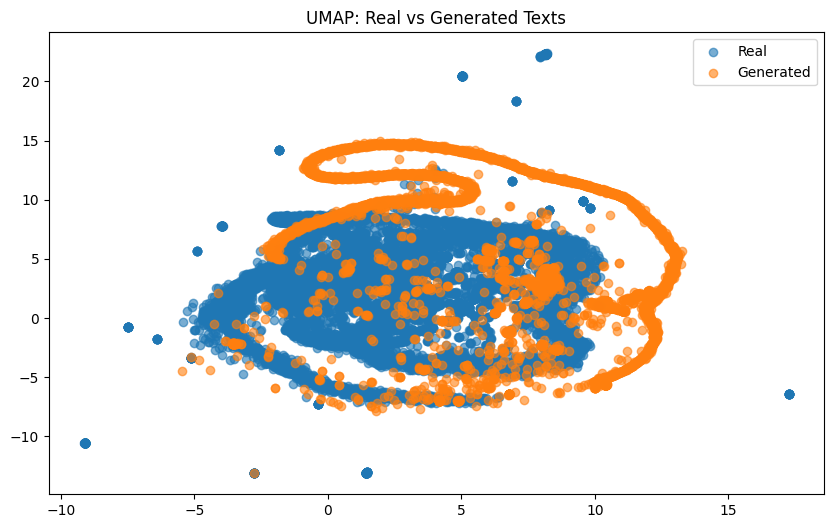

Jaccard Similarity between real and generated text: 0.0733


In [ ]:
plot_umap(real_df["text"].tolist(), synthetic_df["text"].tolist())
sim = compute_jaccard_similarity(real_df["text"].tolist(), synthetic_df["text"].tolist())
print(f"Jaccard Similarity between real and generated text: {sim:.4f}")


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch

def fine_tune_xlnet(real_df, label_col="label", text_col="text", num_labels=3):
    tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")
    model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=num_labels)

    def tokenize(example):
        return tokenizer(example[text_col], truncation=True, padding="max_length", max_length=128)

    dataset = Dataset.from_pandas(real_df[[text_col, label_col]].rename(columns={label_col: "label"}))
    dataset = dataset.class_encode_column("label")
    tokenized = dataset.map(tokenize, batched=True)
    tokenized.set_format("torch", columns=["input_ids", "attention_mask", "label"])
    split = tokenized.train_test_split(test_size=0.2)

    args = TrainingArguments(
        output_dir="./results",
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        logging_dir="./logs",
        logging_steps=10,
        save_strategy="no",  # use only if supported
    )


    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=split["train"],
        eval_dataset=split["test"]
    )

    trainer.train()
    return model, tokenizer


In [ ]:
def evaluate_on_synthetic(model, tokenizer, synthetic_df, label_col="label", text_col="text"):
    from sklearn.metrics import classification_report
    from datasets import Dataset

    dataset = Dataset.from_pandas(synthetic_df[[text_col, label_col]].rename(columns={label_col: "label"}))
    dataset = dataset.class_encode_column("label")

    def tokenize(example):
        return tokenizer(example[text_col], truncation=True, padding="max_length", max_length=128)

    tokenized = dataset.map(tokenize, batched=True)
    tokenized.set_format("torch", columns=["input_ids", "attention_mask", "label"])

    trainer = Trainer(model=model)
    preds = trainer.predict(tokenized)
    y_pred = preds.predictions.argmax(axis=1)
    y_true = tokenized["label"]

    print("\nSynthetic Data Evaluation:")
    print(classification_report(y_true, y_pred))


In [ ]:
# Step 1: Fine-tune XLNet on real data
model, tokenizer = fine_tune_xlnet(real_df, label_col="overall_sentiment", text_col="text", num_labels=real_df["overall_sentiment"].nunique())

# Step 2: Evaluate the fine-tuned model on synthetic data
evaluate_on_synthetic(model, tokenizer, synthetic_df, label_col="overall_sentiment", text_col="text")


Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Stringifying the column:   0%|          | 0/21644 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/21644 [00:00<?, ? examples/s]

Map:   0%|          | 0/21644 [00:00<?, ? examples/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: avantithale0922 (avantithale0922-sardar-vallabhbhai-national-institute-of) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,0.973000
20,0.822800
30,0.748400
40,0.709800
50,0.671500
60,0.683200
70,0.776300
80,0.543200
90,0.505800
100,0.654700


Step,Training Loss
10,0.973000
20,0.822800
30,0.748400
40,0.709800
50,0.671500
60,0.683200
70,0.776300
80,0.543200
90,0.505800
100,0.654700


Casting to class labels:   0%|          | 0/8800 [00:00<?, ? examples/s]

Map:   0%|          | 0/8800 [00:00<?, ? examples/s]


Synthetic Data Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.54      0.65      3700
           1       0.10      0.00      0.01      1400
           2       0.56      0.95      0.70      3700

    accuracy                           0.63      8800
   macro avg       0.49      0.50      0.45      8800
weighted avg       0.59      0.63      0.57      8800



In [ ]:
# Step 1: Fine-tune XLNet on real data
model, tokenizer = fine_tune_xlnet(real_df, label_col="predicted_fine_grained", text_col="text", num_labels=real_df["predicted_fine_grained"].nunique())

# Step 2: Evaluate the fine-tuned model on synthetic data
evaluate_on_synthetic(model, tokenizer, synthetic_df, label_col="fine_grained_sentiment", text_col="text")


Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Casting to class labels:   0%|          | 0/21644 [00:00<?, ? examples/s]

Map:   0%|          | 0/21644 [00:00<?, ? examples/s]

Step,Training Loss
10,1.731500
20,1.615900
30,1.585400
40,1.716200
50,1.681400
60,1.475300
70,1.731700
80,1.640700
90,1.467600
100,1.658700


Casting to class labels:   0%|          | 0/8800 [00:00<?, ? examples/s]

Map:   0%|          | 0/8800 [00:00<?, ? examples/s]


Synthetic Data Evaluation:
              precision    recall  f1-score   support

           0       0.52      0.10      0.16      1173
           1       0.61      0.12      0.20      1174
           2       0.12      0.10      0.11       176
           3       0.31      0.41      0.35      1233
           4       0.35      0.52      0.42      1232
           5       1.00      0.00      0.00      1400
           6       0.45      0.48      0.46      1177
           7       0.14      0.41      0.21      1235

    accuracy                           0.28      8800
   macro avg       0.44      0.27      0.24      8800
weighted avg       0.48      0.28      0.25      8800



In [ ]:
import pandas as pd

In [ ]:
real_df= pd.read_csv("/content/drive/MyDrive/Mini Project/Generated/sampled.csv")
synthetic_df=pd.read_csv("/content/drive/MyDrive/Mini Project/Generated/combined_synthetic_sentiment_data.csv")

In [ ]:
import random
import numpy as np

def compute_jaccard_similarity_set(s1, s2):
    intersection = len(s1 & s2)
    union = len(s1 | s2)
    return intersection / union if union > 0 else 0

def compute_dataset_diversity_sampled(texts, num_samples=1000):
    tokenized = [set(text.lower().split()) for text in texts]
    n = len(tokenized)

    max_similarity = 0
    for _ in range(num_samples):
        i, j = random.sample(range(n), 2)
        sim = compute_jaccard_similarity_set(tokenized[i], tokenized[j])
        max_similarity = max(max_similarity, sim)

    diversity = 1 - max_similarity
    return diversity




real_texts = real_df["text"].tolist()
generated_texts = synthetic_df["text"].tolist()
combined_texts = real_texts + generated_texts

diversity_score = compute_dataset_diversity_sampled(combined_texts)
print(f"Diversity Score (1 - max Jaccard similarity): {diversity_score:.4f}")


Diversity Score (1 - max Jaccard similarity): 0.8333
